<a href="https://colab.research.google.com/github/KaziTanvir/Car-brand-prediciton-small-dataset-/blob/main/car_brand_classification(small_scale).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Brand Classification

## importing libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import ResNet152
from keras.utils.vis_utils import plot_model
from glob import glob
from keras.models import Model
from keras.layers import Flatten,Dense,Dropout,Softmax
from tensorflow.keras.optimizers import Adam


## importing data


In [2]:
from google.colab import files
files.upload()

Saving dataset.zip to dataset.zip


{'dataset.zip': b'PK\x03\x04\n\x00\x00\x00\x00\x00\x80^EU\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x00\x00\x00Test/PK\x03\x04\n\x00\x00\x00\x00\x00\x13YEU\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\n\x00\x00\x00Test/audi/PK\x03\x04\x14\x00\x00\x00\x08\x00\xabx\xdeP\xd2\xed\xcc-%1\x00\x0081\x00\x00\x10\x00\x00\x00Test/audi/21.jpgM\xb7eT\x9cM\xb0-\xfc\xe0\xee\x12\x18\xdc\xdd\xdd\xdd\x1d\x86\x01\x06\t\xee\x04ww\t\x90\xe0\xee\xae\xc1\x9d\x04\x19\\\x02\x83\x04w\t\x04\x0b\x96@B\xf8\xdes\xd7\xfa\xce\xbd\xbb\xfbG\xad\xae\xee\xaa\xbd\xbb\x7ft\xd5\xeb\xda\xeb\x1e\x80\xaf\xae\xac\xa6\x0c  \x00\x00\xc2\x7f\x03x\xdd\x04b\x00\x0cT4""B\x12"""\x12R\x927\xe4d\xff\x837 2\n\x10\xe8\xcd\x9b\xff,22\n\n\x1av:2\x10\x13\xc5\x1b2:>z&v\x0enn\x1e2\x1a\x01Q\x01.\x11V.n\x0e\x04LLL\\\x1c\\\x10>>\x88\x8b\x99\x86\x89\xeb\x7f\xc0\xcd\xc5%\xc4\xf5\xbf\xe0\xfd?\xf3\xff\xac\xfe_p\xfc\xaf\xf1:\x04\x10\xa0\x03\xe5\x08\xc2H\x08\xf4\x00"\x01\x02\x12\x01\xc2+\x0c\xa0\x04\x00DD\xa4\xff\xa1\xfa\xff\x03\x19\x05\t

In [3]:
!unzip /content/dataset.zip 

Archive:  /content/dataset.zip
   creating: Test/
   creating: Test/audi/
  inflating: Test/audi/21.jpg        
  inflating: Test/audi/22.jpg        
  inflating: Test/audi/23.jpg        
  inflating: Test/audi/24.jpg        
  inflating: Test/audi/25.jpg        
  inflating: Test/audi/26.jpg        
  inflating: Test/audi/27.jpg        
  inflating: Test/audi/28.jpg        
  inflating: Test/audi/29.jpg        
   creating: Test/lamborghini/
  inflating: Test/lamborghini/20.jog.jpg  
  inflating: Test/lamborghini/21.jpg  
  inflating: Test/lamborghini/22.jpg  
  inflating: Test/lamborghini/23.jpg  
  inflating: Test/lamborghini/24.jpg  
  inflating: Test/lamborghini/25.jpg  
  inflating: Test/lamborghini/26.jpg  
  inflating: Test/lamborghini/27.jpg  
  inflating: Test/lamborghini/28.jpg  
  inflating: Test/lamborghini/29.jpg  
  inflating: Test/lamborghini/30.jpg  
   creating: Test/mercedes/
  inflating: Test/mercedes/10.jpg    
  inflating: Test/mercedes/11.jpg    
  inflating: Tes

In [4]:
Image_size = [224,224]
valid_path = "/content/Test"
train_path = "/content/Train"

## importing model

234708992/234698864 [==============================] - 1s 0us/step
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.664497 to fit



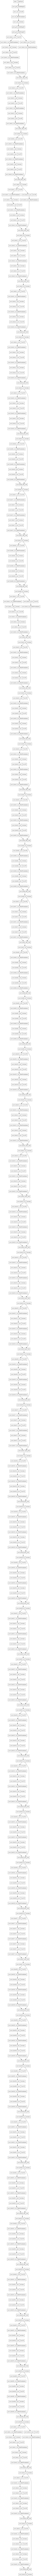

In [5]:
resnet = ResNet152(include_top=False , input_shape=Image_size+[3],weights='imagenet')

plot_model(resnet)



In [6]:
resnet.summary()

Model: "resnet152"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                          

In [7]:

for layer in resnet.layers:
  layer.trainable = False

In [8]:
resnet.summary()

Model: "resnet152"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                          

## number of classes in output

In [9]:


folders = glob("/content/Train/*")
folders

['/content/Train/lamborghini',
 '/content/Train/audi',
 '/content/Train/mercedes']

## Adding extra layer

In [10]:
x = Flatten()(resnet.output)

## creating output layer

In [11]:
prediction = Dense(len(folders),activation='softmax')(x)

## creating model

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.661893 to fit



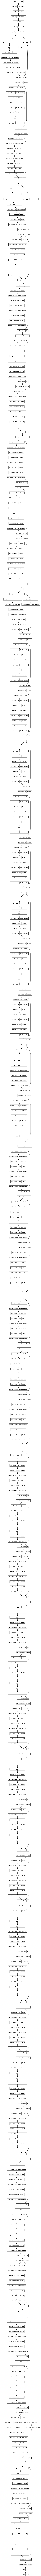

In [12]:
model = Model(inputs = resnet.input , outputs = prediction)

plot_model(model)

In [13]:
model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory("/content/Train",target_size=(224,224),batch_size=8,class_mode='categorical')

test_set = train_datagen.flow_from_directory("/content/Test",target_size=(224,224),batch_size=8,class_mode='categorical')

Found 103 images belonging to 3 classes.
Found 31 images belonging to 3 classes.


In [15]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  verbose=2
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50
13/13 - 24s - loss: 6.4138 - accuracy: 0.3301 - val_loss: 4.8021 - val_accuracy: 0.3548 - 24s/epoch - 2s/step
Epoch 2/50
13/13 - 2s - loss: 3.2925 - accuracy: 0.4466 - val_loss: 1.4907 - val_accuracy: 0.4839 - 2s/epoch - 148ms/step
Epoch 3/50
13/13 - 2s - loss: 1.8012 - accuracy: 0.5146 - val_loss: 1.7676 - val_accuracy: 0.4516 - 2s/epoch - 149ms/step
Epoch 4/50
13/13 - 2s - loss: 1.7271 - accuracy: 0.5243 - val_loss: 1.9855 - val_accuracy: 0.5161 - 2s/epoch - 150ms/step
Epoch 5/50
13/13 - 2s - loss: 1.1949 - accuracy: 0.6019 - val_loss: 2.5268 - val_accuracy: 0.4839 - 2s/epoch - 151ms/step
Epoch 6/50
13/13 - 2s - loss: 1.5252 - accuracy: 0.5825 - val_loss: 2.8495 - val_accuracy: 0.5161 - 2s/epoch - 150ms/step
Epoch 7/50
13/13 - 2s - loss: 1.0901 - accuracy: 0.5922 - val_loss: 1.0611 - val_accuracy: 0.6452 - 2s/epoch - 148ms/step
Epoch 8/50
13/13 - 2s - loss: 0.6100 - accuracy: 0.7087 - val_loss: 0.7826 - val_accuracy: 0.6452 - 2s/epoch - 150ms/step
Epoch 9/50
13/13 - 2s - l

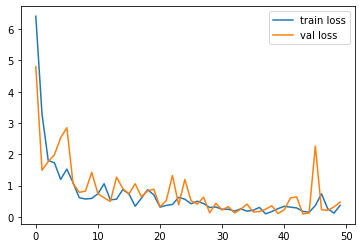

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

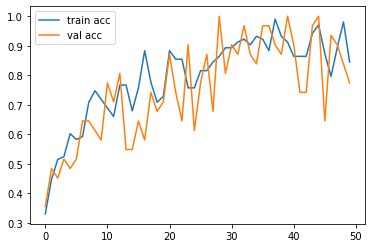

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
from tensorflow.keras.models import load_model

model.save('model_resnet152.h5')

In [19]:
y_pred = model.predict(test_set)

y_pred

array([[1.11885107e-04, 2.14535147e-02, 9.78434563e-01],
       [3.42326275e-05, 4.06070985e-02, 9.59358633e-01],
       [6.98160966e-06, 1.68594439e-03, 9.98307109e-01],
       [7.46861622e-02, 4.71060723e-01, 4.54253048e-01],
       [2.68826354e-03, 2.35770094e-05, 9.97288227e-01],
       [8.97217631e-01, 7.52034271e-03, 9.52619761e-02],
       [4.72435204e-05, 5.75021497e-12, 9.99952793e-01],
       [5.22483289e-01, 9.97289177e-03, 4.67543900e-01],
       [3.39700282e-01, 1.49591908e-01, 5.10707855e-01],
       [4.15923743e-04, 4.13722591e-05, 9.99542713e-01],
       [1.37024885e-03, 2.43027200e-04, 9.98386741e-01],
       [3.42381427e-05, 7.16633876e-05, 9.99894142e-01],
       [9.99986768e-01, 9.22586540e-09, 1.32054711e-05],
       [1.46330439e-03, 8.38182867e-01, 1.60353765e-01],
       [1.54606270e-04, 8.93601179e-01, 1.06244184e-01],
       [3.81261314e-04, 9.25135493e-01, 7.44832680e-02],
       [5.37568212e-01, 1.63035281e-02, 4.46128309e-01],
       [4.21569493e-05, 4.10354

In [21]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [28]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

model=load_model('model_resnet152.h5')

img=image.load_img('/content/Test/lamborghini/24.jpg',target_size=(224,224))

x=image.img_to_array(img)

x =x /255

x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

preds = model.predict(x)
preds=np.argmax(preds, axis=1)
if preds==1:
  preds="The Car IS Audi"
elif preds==2:
  preds="The Car is Lamborghini"
else:
  preds="The Car Is Mercedes"
print(preds)

The Car is Lamborghini
